In [1]:
import os
import re
import jieba
import docx
import math
from nltk import FreqDist, word_tokenize
from collections import Counter
from tqdm import tqdm
import matplotlib.pyplot as plt

# 设置matplotlib支持中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [26]:
def calculate_entropy_word(text):
    char_counts = Counter(text)
    total_chars = sum(char_counts.values())
    entropy = 0
    for char,count in tqdm(char_counts.items()):
        p = count / total_chars
        entropy -= p* math.log2(p)

    return entropy


def calculate_entropy_words(text):
    words = jieba.lcut(text)

    word_counts = Counter(words)
    total_words = sum(word_counts.values())

    entropy = 0
    for word,count in tqdm(word_counts.items()):
        p = count /total_words
        entropy -= p * math.log2(p)

    return entropy


def calculate_entropy_english(text):
    char_counts = Counter(text.lower())
    total_chars = sum(char_counts.values())

    entropy = 0
    for char,count in tqdm(char_counts.items()):
        p = count / total_chars

        entropy -= p * math.log2(p)

    return entropy

def calculate_entropy_englishs(text):
    words = text.lower().split()
    word_counts = Counter(words)
    total_words = sum(word_counts.values())

    entropy = 0
    for word,count in tqdm(word_counts.items()):
        p = count / total_words
        entropy -= p * math.log2(p)

    return entropy

In [27]:
folder_path = 'wiki_zh_2019/wiki_zh'  # 请根据实际路径调整
corpus_parts = []

# 定义正则表达式，保留中文字符和常见中文标点
# chinese_pattern = re.compile(
#     r'[^\u4e00-\u9fa5。，！？、；：“”‘’（）《》【】『』「」〈〉〖〗〘〙〚〛]'
# )
chinese_pattern = re.compile(r'[^\u4e00-\u9fa5]')
#只保留中文字符
# 遍历文件夹
for childfolder in tqdm(os.listdir(folder_path), desc="Processing folders"):
    childfolder_path = os.path.join(folder_path, childfolder)
    if os.path.isdir(childfolder_path):
        # 遍历子文件夹中的文件
        for filename in os.listdir(childfolder_path):
            file_path = os.path.join(childfolder_path, filename)
            if os.path.isfile(file_path):
                try:
                    # 读取文件内容
                    with open(file_path, 'r', encoding='utf-8') as file:
                        content = file.read()
                        # 去掉非中文字符和标点
                        processed_content = chinese_pattern.sub('', content)
                        # 将处理后的内容添加到列表中
                        corpus_parts.append(processed_content)
                except Exception as e:
                    print(f"Error reading {file_path}: {e}")

# 合并所有文本为一个大字符串
corpus = ''.join(corpus_parts)
print(f"Total corpus length: {len(corpus)} characters")

Processing folders: 100%|██████████| 13/13 [00:24<00:00,  1.87s/it]

Total corpus length: 341816370 characters


In [ ]:
entropy=calculate_entropy_word(corpus)
print(f"中文字信息熵{entropy}")

100%|██████████| 12763/12763 [00:00<00:00, 2247634.12it/s]


9.854372492925405

In [ ]:
# entropy=calculate_entropy_words(corpus)
# print(f"中文词语信息熵{entropy}")

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\XCG2\AppData\Local\Temp\jieba.cache
Loading model cost 0.479 seconds.
Prefix dict has been built successfully.


In [28]:
def calculate_entropy_words(text, chunk_size=10000):
    """
    计算中文词语信息熵（分块处理）
    :param text: 输入文本
    :param chunk_size: 每块的大小（字符数）
    :return: 信息熵
    """
    def chunk_text(text, size):
        """将文本分割为较小的块"""
        for i in range(0, len(text), size):
            yield text[i:i + size]

    # 统计词频
    word_counts = Counter()
    for chunk in tqdm(chunk_text(text, chunk_size)):
        words = jieba.lcut(chunk)  # 分词
        word_counts.update(words)  # 更新词频

    # 计算信息熵
    total_words = sum(word_counts.values())
    entropy = 0
    for word, count in word_counts.items():
        p = count / total_words
        entropy -= p * math.log2(p)
    return entropy

In [29]:
entropy=calculate_entropy_words(corpus)
print(f"中文词语信息熵{entropy}")

0it [00:00, ?it/s]Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\XCG2\AppData\Local\Temp\jieba.cache
Loading model cost 0.336 seconds.
Prefix dict has been built successfully.
34182it [31:16, 18.22it/s]


中文词语信息熵13.355834532880332


In [9]:
import nltk
import math
import re
from nltk.corpus import gutenberg
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

# 下载古腾堡语料库
nltk.download('gutenberg')
r1 = r'[^a-zA-Z\s]'
text = gutenberg.raw()
#去掉所有的换行和多余的空格
text = re.sub(r1, ' ', text) 
text = text.lower()
text = text.replace('\n', ' ')
text = " ".join(text.split())

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\XCG2\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [13]:
words = text.split()
letters = [char for char in text if char.isalpha()]

In [14]:
freq_words_dict= FreqDist(words)
freq_letters_dict= FreqDist(letters)

In [15]:
freq_letters_dict

FreqDist({'e': 1119617, 't': 827161, 'a': 731203, 'o': 678136, 'h': 650743, 'n': 615091, 'i': 577691, 's': 556863, 'r': 502402, 'd': 400494, ...})

In [12]:
def calculate_average_entropy(frequency_dict):
    '''
    计算平均信息熵
    '''
    total_count = sum(frequency_dict.values())
    entropy = 0.0
    for count in frequency_dict.values():
        probability = count / total_count
        entropy -= probability * math.log2(probability)
    return entropy

In [16]:
letter_entropy = calculate_average_entropy(freq_letters_dict)
print(f"letter的平均信息熵: {letter_entropy}")

word_entropy = calculate_average_entropy(freq_words_dict)
print(f"word的平均信息熵: {word_entropy}")


letter的平均信息熵: 4.158618822194603
word的平均信息熵: 9.728047292817916


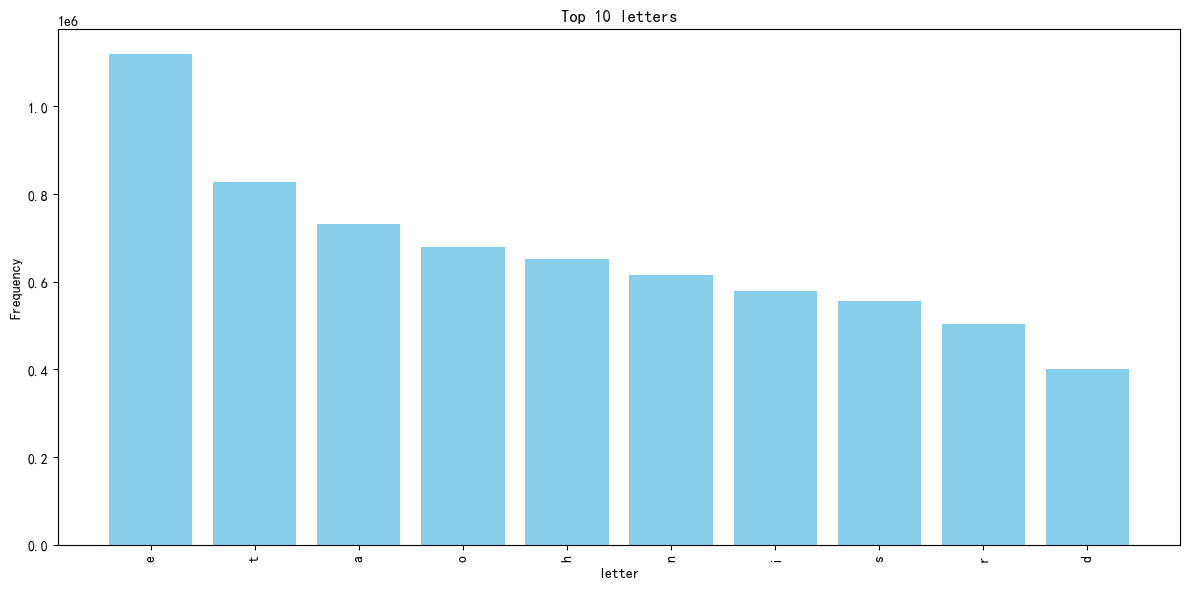

In [25]:
letter_most = dict(freq_letters_dict.most_common())
word_most = dict(freq_words_dict.most_common())

plt.figure(figsize=(12, 6))
plt.bar(list(letter_most.keys())[:10], list(letter_most.values())[:10], color ="skyblue")  # 取前50个字
#plt.grid()
plt.title("Top 10 letters")
plt.xlabel("letter")
plt.ylabel("Frequency")
plt.xticks(rotation=90)  # 旋转X轴标签，避免重叠
plt.tight_layout()  # 自动调整布局
plt.show()

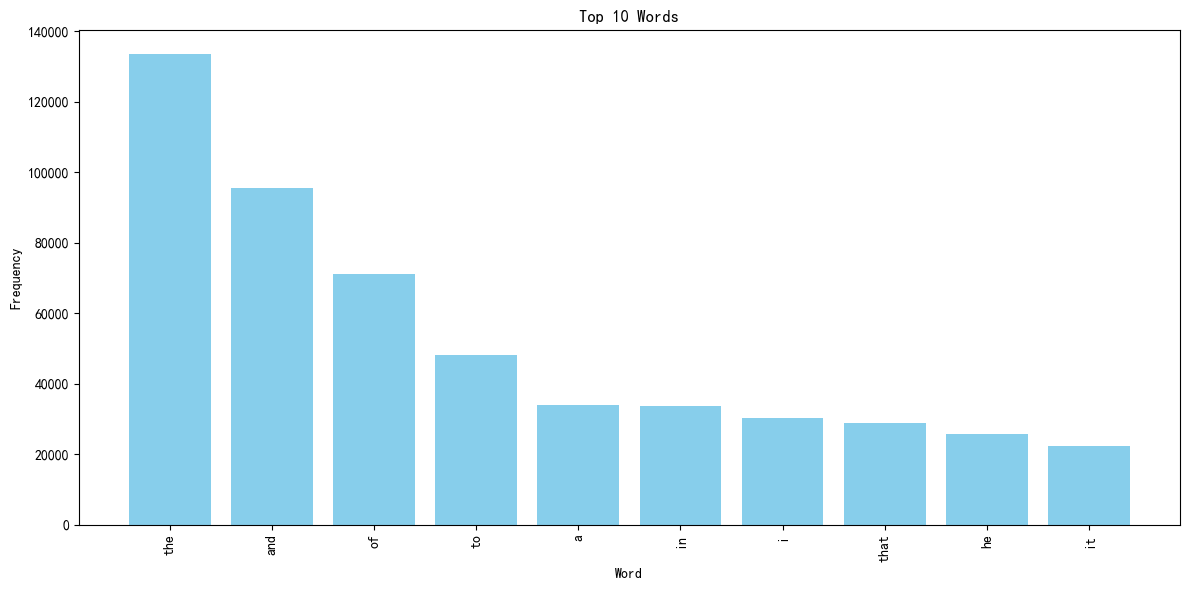

In [24]:
plt.figure(figsize=(12, 6))
plt.bar(list(word_most.keys())[:10], list(word_most.values())[:10],color="skyblue")  # 取前50个词
plt.title("Top 10 Words")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.xticks(rotation=90)  # 旋转X轴标签，避免重叠
plt.tight_layout()  # 自动调整布局
plt.show()

Processing folders: 100%|██████████| 13/13 [00:08<00:00,  1.55it/s]


MemoryError: 